In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataframe = pd.read_csv("Zomato data .csv")

In [14]:
zomato = dataframe
zomato

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [16]:
def handlerate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

zomato['rate'] = dataframe['rate'].apply(handlerate)
print(zomato.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [17]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of Resturants')

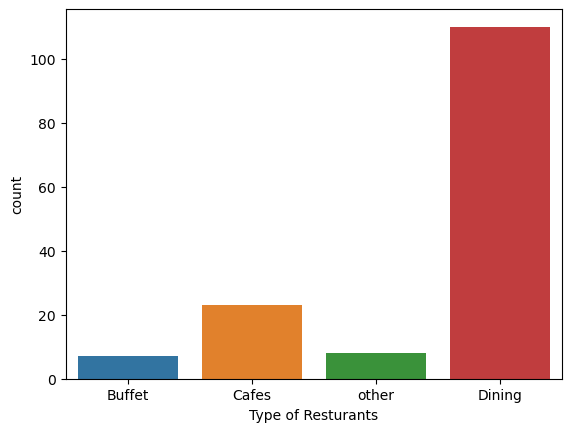

In [21]:
sns.countplot(x=zomato['listed_in(type)'])
plt.xlabel("Type of Resturants")

Text(0, 0.5, 'Votes')

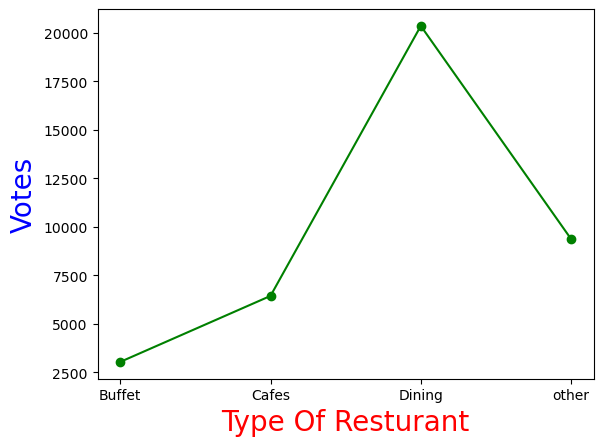

In [27]:
gp_data = zomato.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'vote': gp_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type Of Resturant", c="red", size = 20)
plt.ylabel("Votes", c = "blue", size = 20)

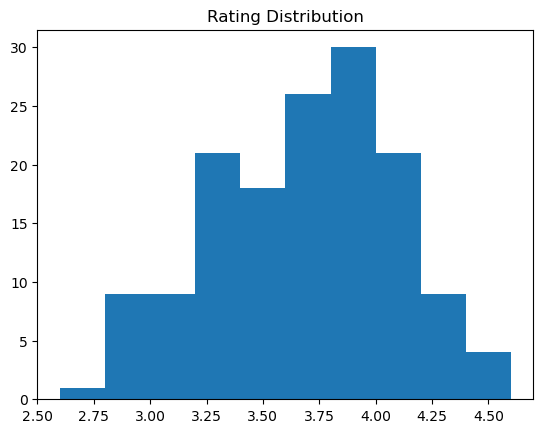

In [35]:
plt.hist(zomato['rate'],bins = 10)
plt.title("Rating Distribution")
plt.show()

In [39]:
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'AOV for 2 People')

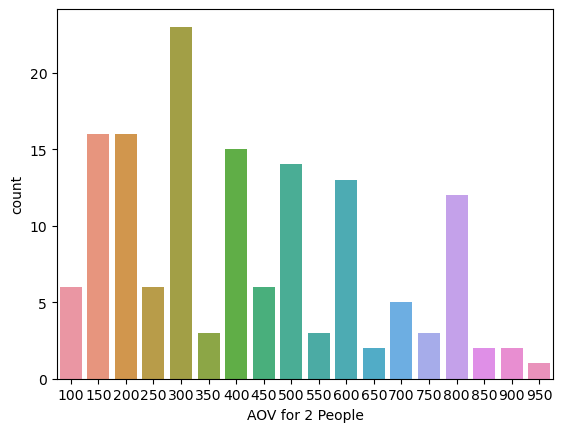

In [41]:
#avg order value for 2 people
aov = zomato['approx_cost(for two people)']
sns.countplot(x=aov)
plt.xlabel("AOV for 2 People")

<AxesSubplot:xlabel='online_order', ylabel='rate'>

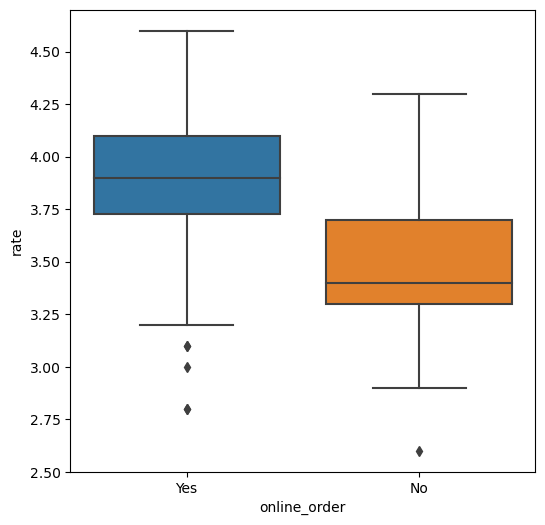

In [43]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = zomato)

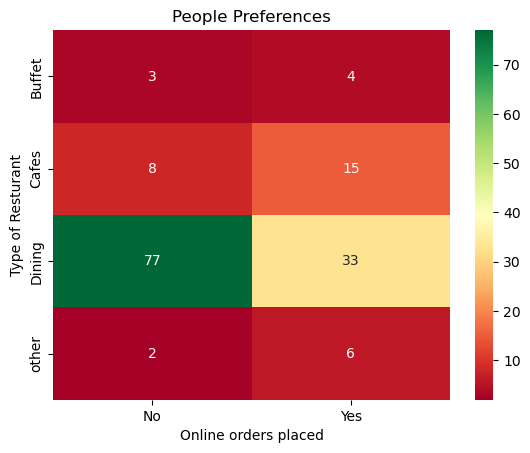

In [44]:
pt = zomato.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pt, annot = True, cmap = "RdYlGn", fmt = "d")
plt.title("People Preferences")
plt.xlabel("Online orders placed")
plt.ylabel("Type of Resturant")
plt.show()